In [2]:
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [6]:
confirm = pd.read_csv('/content/drive/MyDrive/데이터교육/수업자료/자료/confirmed.csv')
confirm.head(2)

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
death = pd.read_csv('/content/drive/MyDrive/데이터교육/수업자료/자료/death.csv')
death.head(2)

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
confirm_by_locate = confirm.drop( columns=['날짜'] ).loc[ confirm.index[-1] ]
confirm_by_locate

서울    139154
부산     15231
대구     18201
인천     22400
광주      5791
대전      8086
울산      5561
세종      1445
경기    123466
강원      7943
충북      8519
충남     11938
전북      5908
전남      4077
경북     10539
경남     14226
제주      3432
Name: 656, dtype: int64

In [10]:
death_by_locate = death.drop( columns=['날짜'] ).loc[ death.index[-1] ]
death_by_locate

서울     941
부산     177
대구     296
인천     126
광주      29
대전      56
울산      57
세종       2
경기    1061
강원      69
충북      89
충남      74
전북      70
전남      25
경북     100
경남      47
제주       9
Name: 656, dtype: int64

In [11]:
confirm_by_locate = confirm_by_locate.sort_values( ascending=False )
death_by_locate = death_by_locate.sort_values( ascending=False )

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


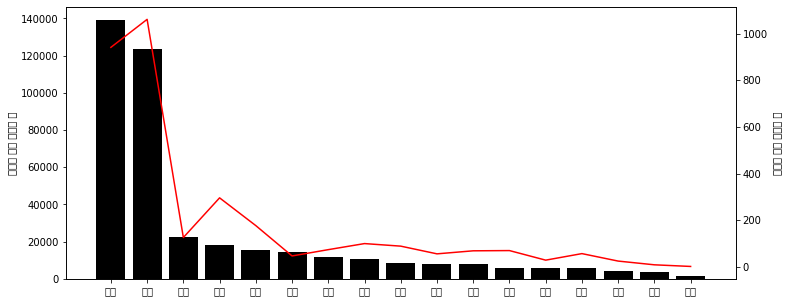

In [12]:
# 확진자 수 표현
plt.figure( figsize = (12, 5) )
sns.barplot( x=confirm_by_locate.index, y=confirm_by_locate, color='black' )
plt.ylabel('지역별 전체 확진자 수')

# 사망자 수 표현
# 단위가 다른 경우에 한번에 그리는 방법
ax = plt.gca()
ax2 = ax.twinx()

death_by_locate = death_by_locate[ confirm_by_locate.index ]
sns.lineplot( x=death_by_locate.index, y=death_by_locate, ax=ax2, color='red' )
ax2.set_ylabel('지역별 전체 사망자 수')

plt.show()

## 지역별(서울) 확진자, 사망자 변화 시각화
- 날짜를 인덱스로 해서 서울 지역의 확진자(사망자)수의 변화를 그래프로 표현해봅시다. 

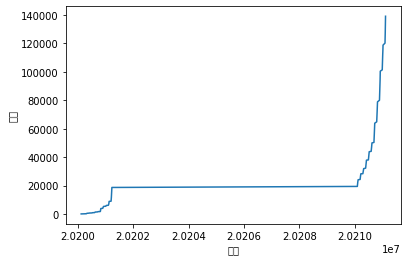

In [13]:
sns.lineplot( data=confirm, x='날짜', y='서울')

날짜는 날짜 형태로 처리를 해주는게 좋습니다. 

In [17]:
# 날짜를 int에서 str로
confirm['날짜'] = pd.to_datetime( confirm['날짜'], format='%Y%m%d')
death['날짜'] = pd.to_datetime( death['날짜'], format='%Y%m%d')

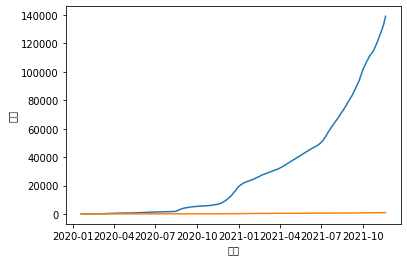

In [18]:
sns.lineplot( data=confirm, x='날짜', y='서울')
sns.lineplot( data=death, x='날짜', y='서울')   # 단위에 문제가 있음  만 단위

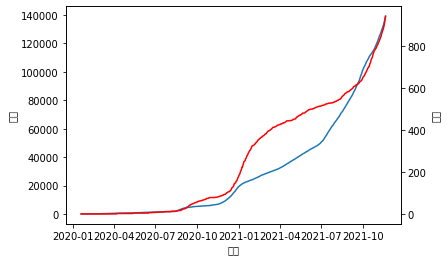

In [20]:
sns.lineplot( data=confirm, x='날짜', y='서울')

ax = plt.gca()    # 단위 변경
ax2 = ax.twinx()
sns.lineplot( data=death, x='날짜', y='서울', ax=ax2, color = 'red')

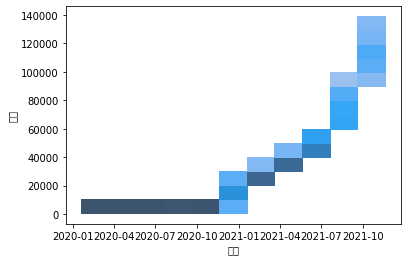

In [21]:
sns.histplot( data=confirm, x='날짜', y='서울')

## 지역별(서울) 일일 확진자(사망자) 수 시각화

In [23]:
confirm.diff()   # diff는 빼서 계산됨


,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 days,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,1 days,845.0,87.0,38.0,131.0,11.0,35.0,9.0,6.0,659.0,51.0,28.0,42.0,56.0,29.0,9.0,45.0,43.0
653,1 days,1435.0,103.0,56.0,159.0,34.0,45.0,14.0,16.0,963.0,54.0,28.0,71.0,50.0,36.0,26.0,66.0,23.0
654,1 days,1428.0,90.0,73.0,195.0,34.0,36.0,10.0,10.0,966.0,62.0,26.0,82.0,54.0,40.0,51.0,98.0,28.0
655,1 days,1401.0,77.0,47.0,188.0,24.0,53.0,4.0,3.0,849.0,72.0,20.0,56.0,24.0,46.0,49.0,78.0,31.0


In [24]:
death.diff()   # diff는 빼서 계산됨

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,1 days,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
653,1 days,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
654,1 days,14.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0
655,1 days,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [27]:
confirm.drop( columns='날짜').diff().fillna(0)

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,845.0,87.0,38.0,131.0,11.0,35.0,9.0,6.0,659.0,51.0,28.0,42.0,56.0,29.0,9.0,45.0,43.0
653,1435.0,103.0,56.0,159.0,34.0,45.0,14.0,16.0,963.0,54.0,28.0,71.0,50.0,36.0,26.0,66.0,23.0
654,1428.0,90.0,73.0,195.0,34.0,36.0,10.0,10.0,966.0,62.0,26.0,82.0,54.0,40.0,51.0,98.0,28.0
655,1401.0,77.0,47.0,188.0,24.0,53.0,4.0,3.0,849.0,72.0,20.0,56.0,24.0,46.0,49.0,78.0,31.0


In [28]:
death.drop( columns='날짜').diff().fillna(0)

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
653,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
654,14.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0
655,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [29]:
tmp = confirm.drop( columns='날짜').diff().fillna(0)
confirm_by_day = pd.concat( [confirm['날짜'], tmp], axis = 1)     # 원본에 있는 날짜를 합쳐준다
confirm_by_day

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2021-11-16,845.0,87.0,38.0,131.0,11.0,35.0,9.0,6.0,659.0,51.0,28.0,42.0,56.0,29.0,9.0,45.0,43.0
653,2021-11-17,1435.0,103.0,56.0,159.0,34.0,45.0,14.0,16.0,963.0,54.0,28.0,71.0,50.0,36.0,26.0,66.0,23.0
654,2021-11-18,1428.0,90.0,73.0,195.0,34.0,36.0,10.0,10.0,966.0,62.0,26.0,82.0,54.0,40.0,51.0,98.0,28.0
655,2021-11-19,1401.0,77.0,47.0,188.0,24.0,53.0,4.0,3.0,849.0,72.0,20.0,56.0,24.0,46.0,49.0,78.0,31.0


In [30]:
tmp = death.drop( columns='날짜').diff().fillna(0)
death_by_day = pd.concat( [death['날짜'], tmp], axis = 1)
death_by_day

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2021-11-16,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
653,2021-11-17,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
654,2021-11-18,14.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0
655,2021-11-19,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


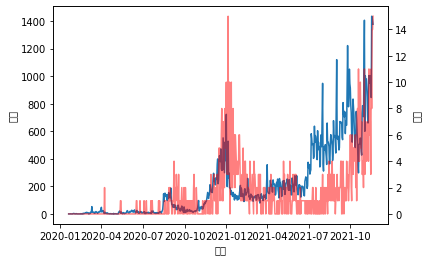

In [32]:
sns.lineplot( data=confirm_by_day, x='날짜', y='서울')

ax = plt.gca()    # 단위 변경
ax2 = ax.twinx()
sns.lineplot( data=death_by_day, x='날짜', y='서울', ax=ax2, color = 'red', alpha=0.5)   # alpha는 투명도